<a href="https://colab.research.google.com/github/johanhoffman/methods-in-computational-science/blob/main/MICS_Optimization_YinengWang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 7: Optimization and Learning**
**Yineng Wang**

# **Abstract**

This report includes the implementation and test for

1. Gradient descent method in $R^n$
2. Newton's method in $R^n$

#**About the code**

This report is written by Yineng Wang, based on Johan Hoffman's template.

In [7]:
# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)
# Modified 2021 by Yineng Wang (yineng@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# The file is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

# **Set up environment**

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# **Introduction**

This laboratory work explores optimization problems and deep neural networks.

The minimization problems in $R^n$ takes the form

$$
f(x^*) \le f(x), \quad x \in D,
$$

with $D \subset R^n$ the search space, $x^* \in D$ the optimal solution, and $f: D \rightarrow R$ the objective function. Among the methods to solve the problem, we implemented the gradient descend method and Newton's method.

# **Method**

## 1. Gradient descent method in $R^n$



Input: objective function $f(x)$

Output: stationary point $x^*$ such that $\Vert \nabla f(x^*) \Vert < TOL$

The gradient descent method takes inspiration from the observation that the value of a function decreases fastest against the direction of the gradient at a point. The iteration takes the form

$$
x^{(k+1)} = x^{(k)} - \alpha^{(k)} \nabla f(x^{(k)}).
$$

The implementation is based on algorithm (15.1) in the lecture notes. For simplicity, a fixed learning rate $\alpha$ is used. The parameter `x0` should be given to indicate the domain of `f`. The parameter `grad` is the closed-form gradient of `f`. If it is not given explicitly, the finite difference method is used to estimate the gradient. The parameter `out`, if given as a list, is used to store the intermediate values of `x` during the iteration.

In [3]:
def estimate_grad(f, x, n, h=1e-3):
    grad = np.zeros(n)
    for i in range(n):
        dx = np.zeros(n)
        dx[i] = h/2
        grad[i] = (f(x + dx) - f(x - dx)) / h
    return grad


def gradient_descent(f, x0, grad=None, tol=1e-6, alpha=0.01, max_iter=100, out=None):
    def get_grad(x):
        return estimate_grad(f, x, n) if grad is None else grad(x)

    n = len(x0)
    x = x0
    if out is not None:
        out.append(x.copy())
    last_grad = get_grad(x)
    for n_iter in range(max_iter):
        x -= alpha * last_grad
        if out is not None:
            out.append(x.copy())
        curr_grad = get_grad(x)
        if np.linalg.norm(curr_grad - last_grad) < tol:
            return (x, n_iter+1)
        last_grad = curr_grad
    return (x, n_iter+1)

## 2. Newton's method in $R^n$

Input: objective function $f(x)$

Output: stationary point $x^*$ such that $\Vert \nabla f(x^*) \Vert < TOL$

Newton's method find the local minimum by letting the gradient of the second-order Taylor's formula (equation (15.7)) of the objective function with respect to the iteration increment $\Delta x$ be zero. This gives the iteration formula

$$
x^{(k+1)} = x^{(k)} - Hf(x^{(k)})^{-1} \nabla f(x^{(k)}).
$$

The implementation is based on algorithm (15.3) in the lecture notes. The parameter `x0` should be given to indicate the domain of `f`. The parameter `hessian` is the closed-form Hessian matrix of `f`. If it is not given explicitly, the finite difference method is used to estimate the Hessian matrix.

In [4]:
def estimate_hessian(f, x, n, h=1e-3):
    hessian = np.zeros((n, n))
    for i in range(n):
        dx = np.zeros(n)
        dx[i] = h/2
        f_prime = lambda x: (f(x + dx) - f(x - dx)) / h
        # Since H is symmetric,
        # we only need to compute the elements above the diagonal
        f_prime_prime = estimate_grad(f_prime, x, i+1)
        hessian[i,:i+1] = f_prime_prime
        hessian[:i+1,i] = f_prime_prime
    return hessian


def newton_method(f, x0, grad=None, hessian=None, tol=1e-6, max_iter=100, out=None):
    def get_grad(x):
        return estimate_grad(f, x, n) if grad is None else grad(x)

    def get_hessian(x):
        return estimate_hessian(f, x, n) if hessian is None else hessian(x)

    n = len(x0)
    x = x0
    if out is not None:
        out.append(x.copy())
    last_grad = get_grad(x)
    last_hessian = get_hessian(x)
    for n_iter in range(max_iter):
        x -= np.linalg.solve(last_hessian, last_grad)
        if out is not None:
            out.append(x.copy())
        curr_grad = get_grad(x)
        if np.linalg.norm(curr_grad - last_grad) < tol:
            return (x, n_iter+1)
        last_grad = curr_grad
        last_hessian = get_hessian(x)
    return (x, n_iter+1)

# **Results**

## 1. Gradient descent method in $R^n$

Test: verify accuracy and convergence with respect to exact solution

In this programming assignment, we choose two objective functions to test. One is the paraboloid

$$f(x_1, x_2) = x_1^2 + 2 x_2^2,$$

whose exact minimum is $f(0, 0) = 0$. We choose the initial guess $x_0 = (1.5, 1.5)$, the learning rate $\alpha = 0.1, 0.01, 0.001$.

The other is one mentioned on [the Wikipedia page](https://en.wikipedia.org/wiki/Gradient_descent#Examples),

$$f(x_1, x_2) = (1-x_1)^2 + 100 (x_2 - x_1^2)^2,$$

whose exact minimum is $f(1, 1) = 0$. We choose the initial guess $x_0 = (1.5, 1.5)$, the learning rate $\alpha = 0.001$. (If we choose $\alpha = 0.1$ or $0.01$, the method will diverge and the iteration value seem to explode.)

which is said to converge very slow due to the zigzaging nature of iteration values.

The gradient descent method converges to [1.83899465e-06 4.39863102e-14] after 61 iterations


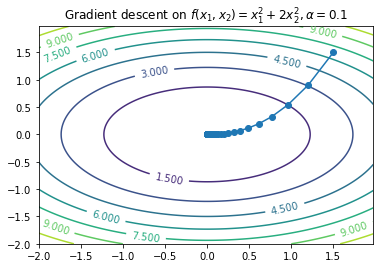

The gradient descent method converges to [2.42956536e-05 3.13461710e-10] after 546 iterations


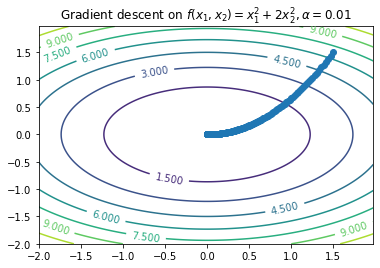

The gradient descent method converges to [2.49203556e-04 4.06850999e-08] after 4347 iterations


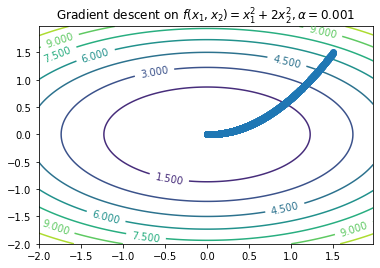

The gradient descent method did not converge after 5000 iterations. The value after the last iteration is [0.94903296 0.90045327].


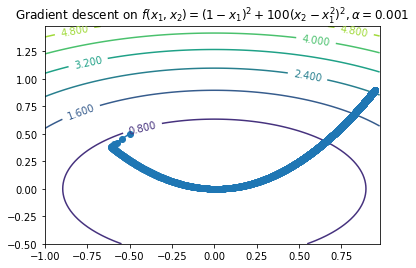

In [5]:
def test_gradient_descent(f, grad, x0, alpha, max_iter, x_start, x_end, y_start, y_end, f_expr):
    delta = 0.025
    x_grid = np.arange(x_start, x_end, delta)
    y_grid = np.arange(y_start, y_end, delta)
    X, Y = np.meshgrid(x_grid, y_grid)
    Z = f1(X, Y)

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS)

    # expand the argument list so that it is accepted by gradient_descent
    f_args_expanded = lambda x: f(*x)
    grad_args_expanded = lambda x: grad(*x)
    out = []    # store the intermediate iteration values
    xn, n_iter = gradient_descent(f_args_expanded, x0, grad=grad_args_expanded, 
                                  alpha=alpha, max_iter=max_iter, out=out)
    if n_iter < max_iter:
        print(f'The gradient descent method converges to {xn} after {n_iter} iterations')
    else:
        print(f'The gradient descent method did not converge after {n_iter} iterations. The value after the last iteration is {xn}.')
    # Plot the trajactory of gradient descent
    x, y = np.array(out).T
    ax.plot(x, y, '-o')
    ax.set_title(f'Gradient descent on {f_expr}')

    plt.show()


def f1(x1, x2):
    return x1**2 + 2 * x2**2

def f1_grad(x1, x2):
    return np.array([2 * x1, 4 * x2])

def f2(x1, x2):
    return (1-x1)**2 + 100 * (x2-x1**2)**2

def f2_grad(x1, x2):
    return np.array([2*x1 - 2 - 400*(x2-x1**2)*x1, 200*(x2-x1**2)])

test_gradient_descent(f1, f1_grad, x0=np.array([1.5, 1.5]), alpha=0.1, max_iter=5000,
                      x_start=-2, x_end=2, y_start=-2, y_end=2,
                      f_expr=r'$f(x_1, x_2) = x_1^2 + 2 x_2^2, \alpha=0.1$')
test_gradient_descent(f1, f1_grad, x0=np.array([1.5, 1.5]), alpha=0.01, max_iter=5000,
                      x_start=-2, x_end=2, y_start=-2, y_end=2,
                      f_expr=r'$f(x_1, x_2) = x_1^2 + 2 x_2^2, \alpha=0.01$')
test_gradient_descent(f1, f1_grad, x0=np.array([1.5, 1.5]), alpha=0.001, max_iter=5000,
                      x_start=-2, x_end=2, y_start=-2, y_end=2,
                      f_expr=r'$f(x_1, x_2) = x_1^2 + 2 x_2^2, \alpha=0.001$')
test_gradient_descent(f2, f2_grad, x0=np.array([-0.5, 0.5]), alpha=0.001, max_iter=5000,
                      x_start=-1, x_end=1, y_start=-0.5, y_end=1.5,
                      f_expr=r'$f(x_1, x_2) = (1-x_1)^2 + 100 (x_2 - x_1^2)^2, \alpha=0.001$')

## 2. Newton's method in $R^n$

Test: verify accuracy and convergence with respect to exact solution

The selection of objective functions are the same as the test for the gradient descent method.

Newton's method converges to [0. 0.] after 2 iterations


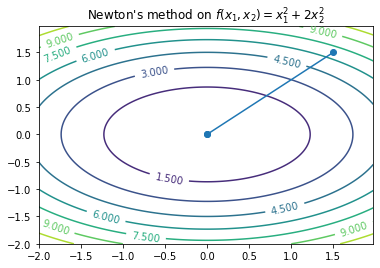

Newton's method did not converge after 5000 iterations. The value after the last iteration is [-3.52560918 12.42991997]


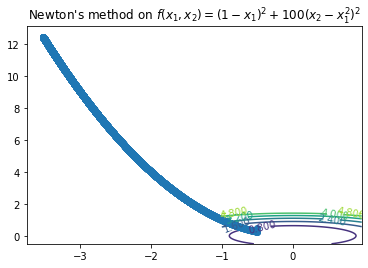

In [6]:
def test_newton_method(f, grad, hessian, x0, max_iter, x_start, x_end, y_start, y_end, f_expr):
    delta = 0.025
    x_grid = np.arange(x_start, x_end, delta)
    y_grid = np.arange(y_start, y_end, delta)
    X, Y = np.meshgrid(x_grid, y_grid)
    Z = f1(X, Y)

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS)

    # expand the argument list so that it is accepted by gradient_descent
    f_args_expanded = lambda x: f(*x)
    grad_args_expanded = lambda x: grad(*x)
    hessian_args_expanded = lambda x: hessian(*x)
    out = []    # store the intermediate iteration values
    xn, n_iter = newton_method(f_args_expanded, x0, grad=grad_args_expanded, 
                               hessian=hessian_args_expanded,
                               max_iter=max_iter, out=out)
    if n_iter < max_iter:
        print(f'Newton\'s method converges to {xn} after {n_iter} iterations')
    else:
        print(f'Newton\'s method did not converge after {n_iter} iterations. The value after the last iteration is {xn}')
    # Plot the trajactory of gradient descent
    x, y = np.array(out).T
    ax.plot(x, y, '-o')
    ax.set_title(f'Newton\'s method on {f_expr}')

    plt.show()


def f1(x1, x2):
    return x1**2 + 2 * x2**2

def f1_grad(x1, x2):
    return np.array([2 * x1, 4 * x2])

def f1_hessian(x1, x2):
    return np.array([[2, 0],
                     [0, 4]])

def f2(x1, x2):
    return (1-x1)**2 + 100 * (x2-x1**2)**2

def f2_grad(x1, x2):
    return np.array([2*x1 - 2 - 400*(x2-x1**2)*x1, 200*(x2-x1**2)])

def f2_hessian(x1, x2):
    return np.array([[2 - 400*x2 - 1200*x1**2, -400*x1],
                     [-400*x1, 200]])

test_newton_method(f1, f1_grad, f1_hessian, x0=np.array([1.5, 1.5]), max_iter=5000,
                   x_start=-2, x_end=2, y_start=-2, y_end=2,
                   f_expr=r'$f(x_1, x_2) = x_1^2 + 2 x_2^2$')
test_newton_method(f2, f2_grad, f2_hessian, x0=np.array([-0.5, 0.5]), max_iter=5000,
                   x_start=-1, x_end=1, y_start=-0.5, y_end=1.5,
                   f_expr=r'$f(x_1, x_2) = (1-x_1)^2 + 100 (x_2 - x_1^2)^2$')

# **Discussion**

As the test shows, for the objective function $f(x_1, x_2) = x_1^2 + 2 x_2^2$ with the initial guess $x_0 = (1.5, 1.5)$ and the learning rate $alpha = 0.1, 0.01, 0.001$, the gradient method converges to the expected solution after 61, 546, 4347 iterations respectively, while Newton's method converges after 2 iterations.

As for the objective function $f(x_1, x_2) = (1-x_1)^2 + 100 (x_2 - x_1^2)^2$ with the initial guess $x_0 = (-0.5, 0.5)$ and the learning rate $alpha = 0.001$, due to its "weird" nature, the gradient method did not converge after 5000 iterations, and from the graph of Newton's method, we somehow know it will eventually diverge.

For Newton's method, if the Hessian matrix is not given as a closed-form formula, or the matrix is very large, it could be costly to compute the optimized value.